<a href="https://colab.research.google.com/github/n-o-r-y/Projects/blob/main/ML_Projects/Smoker_Type_Prediction(Pandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
url = "/content/drive/MyDrive/smoking_driking_dataset_Ver01.csv"
df = pd.read_csv(url)
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
df = df.dropna()

([<matplotlib.patches.Wedge at 0x78283483e440>,
 [Text(-0.3651238767071516, 1.0376341140586796, 'Never'),
  Text(-0.23583516138015403, -1.074421600982034, 'Used to smoke but Quit'),
  Text(0.9352249886309077, -0.5790977643199106, 'Still Smoke')],
 [Text(-0.19915847820390084, 0.565982244032007, '61%'),
  Text(-0.12863736075281126, -0.5860481459902003, '22%'),
  Text(0.5101227210714041, -0.31587150781086026, '18%')])

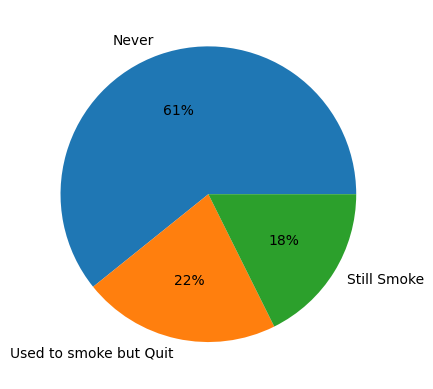

In [ ]:
label = ["Never","Used to smoke but Quit","Still Smoke"]
value = df['SMK_stat_type_cd'].value_counts().values.tolist()
plt.pie(value,labels = label,autopct='%.0f%%')

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['sex', 'DRK_YN'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

column_subset = ['sex','age', 'weight', 'height', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

le = LabelEncoder()
for col in column_subset:
    if col in object_columns:
        df[col] = le.fit_transform(df[col])
    else:
        means = df[col].mean()
        stddev = df[col]
        z_scores = zscore(df[col])
        threshold = 4
        df = df[abs(z_scores) < threshold]
        #print(x.head(4))

df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,1,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,0,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,1,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,1,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,1,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [ ]:
x = df.drop(columns=["SMK_stat_type_cd","DRK_YN"])
x

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,198.0,46.0,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,133.0,40.0,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,205.0,96.0,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,122.0,38.0,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0


In [ ]:
df["SMK_stat_type_cd"] = df["SMK_stat_type_cd"].replace(3, 0)
y = df["SMK_stat_type_cd"]
np.unique(y)

array([0., 1., 2.])

In [ ]:
from sklearn import preprocessing
min_max_Scaler = preprocessing.MinMaxScaler()
x = min_max_Scaler.fit_transform(x)
x

array([[1.        , 0.23076923, 0.7       , ..., 0.2173913 , 0.44736842,
        0.27083333],
       [1.        , 0.15384615, 0.9       , ..., 0.20652174, 0.46052632,
        0.18055556],
       [1.        , 0.30769231, 0.6       , ..., 0.5       , 0.40789474,
        0.46527778],
       ...,
       [0.        , 0.30769231, 0.4       , ..., 0.31521739, 0.34210526,
        0.11111111],
       [1.        , 0.07692308, 0.8       , ..., 0.2173913 , 0.17105263,
        0.11111111],
       [1.        , 0.46153846, 0.5       , ..., 0.25      , 0.55263158,
        0.24305556]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression(solver="sag")
lgr.fit(x_train,y_train)
predict_y = lgr.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
trainAcc = accuracy_score(y_train,predict_y)
trainAcc*100

69.09910861563213

In [ ]:
testPredict_y = lgr.predict(x_test)
testAcc = accuracy_score(y_test,testPredict_y)
testAcc*100

69.0735488176675

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,testPredict_y))

              precision    recall  f1-score   support

         0.0       0.49      0.57      0.53     53194
         1.0       0.82      0.83      0.82    165194
         2.0       0.44      0.34      0.38     45328

    accuracy                           0.69    263716
   macro avg       0.58      0.58      0.58    263716
weighted avg       0.69      0.69      0.69    263716



In [ ]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predict_y = dtc.predict(x_train)
dtc.score(x_train,y_train)*100

100.0

In [ ]:
testPredict_y = dtc.predict(x_test)
testAcc = accuracy_score(y_test,testPredict_y)
testAcc*100

62.62077386279179

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,testPredict_y))

              precision    recall  f1-score   support

         0.0       0.39      0.39      0.39     53194
         1.0       0.79      0.78      0.78    165194
         2.0       0.33      0.34      0.33     45328

    accuracy                           0.63    263716
   macro avg       0.50      0.50      0.50    263716
weighted avg       0.63      0.63      0.63    263716



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
rf_y_train=rf.predict(x_train)
rf_train=accuracy_score(rf_y_train,y_train)*100
rf_train

99.99756230346073

In [ ]:
rf_y_predict=rf.predict(x_test)
rf_test=accuracy_score(rf_y_predict,y_test)*100
rf_test

70.09017276160718

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_predict))

              precision    recall  f1-score   support

         0.0       0.50      0.56      0.53     53194
         1.0       0.84      0.84      0.84    165194
         2.0       0.44      0.38      0.41     45328

    accuracy                           0.70    263716
   macro avg       0.59      0.59      0.59    263716
weighted avg       0.70      0.70      0.70    263716



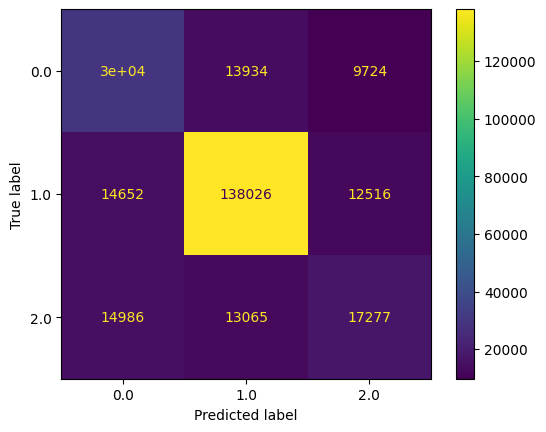

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_y_predict,labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', max_iter=1000)
svm.fit(x_train, y_train)


SGDClassifier()

In [ ]:
predict_y = svm.predict(x_train)
svm.score(x_train,y_train)*100


67.87245971706469

In [ ]:
testPredict_y = svm.predict(x_test)
testAcc = accuracy_score(y_test,testPredict_y)
testAcc*100

67.84874637868009